# Projeto ETL
 
    
   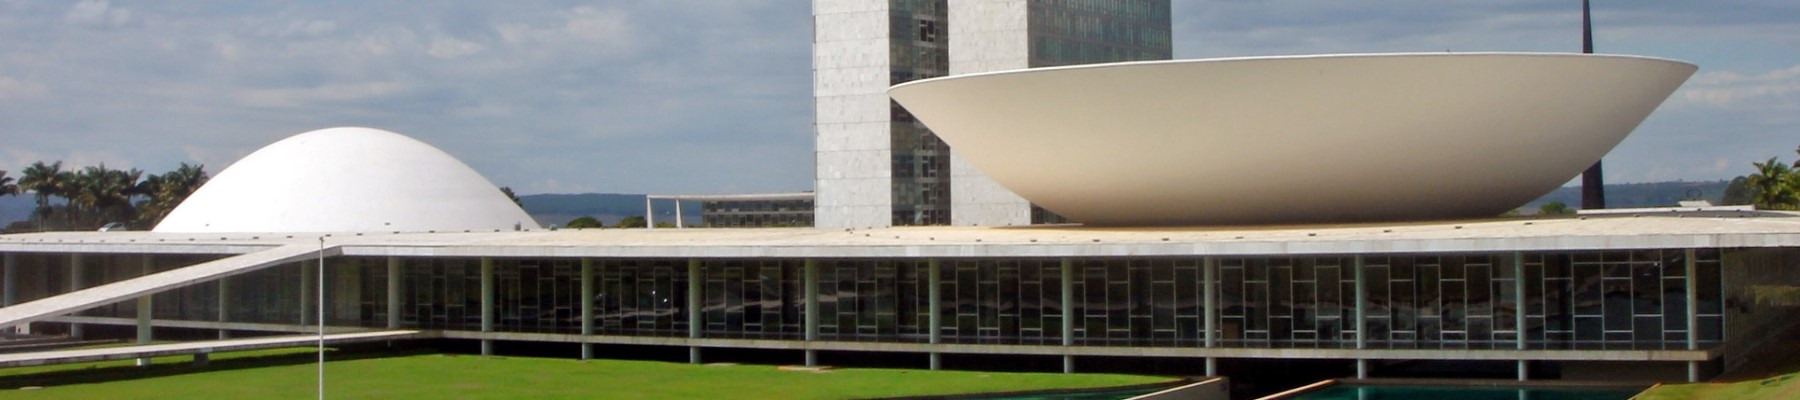
   
   
   
   
   
#### Objetivo: Visualizar e Armazenar os gastos por deputado federal 
    
    1. Obter os dados
    2. Efetuar os ajustes necessários
    3. Armazenar no sqlite 
    
    
 ###### referência https://dadosabertos.camara.leg.br/swagger/api.html
 
 
 
 
 
 
 

# Iniciando o processo de Extração

In [17]:
# Importando as bibliotecas

import pandas as pd
import requests

In [18]:
# Realizando a leitura da base de dados

url = "https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome"
resultado = requests.get(url)

In [19]:
# Ajustando o formato para melhorar a visualização dos dados

deputados = pd.DataFrame(resultado.json()['dados'])

In [20]:
# Exibindo o dataframe

deputados.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
1,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
2,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br


In [21]:
deputados.shape

(513, 9)

### Criando uma estrutura para visualizar os gastos por (ID) de cada deputado

In [11]:
gastos = []
for id in deputados.id:
    url_despesa = "https://dadosabertos.camara.leg.br/api/v2/"
    url_despesa = url_despesa + "deputados/"+str(id)+"/despesas?ordem=ASC&ano=2019"
    resposta = requests.get(url_despesa)
    gasto = pd.DataFrame(resposta.json()['dados'])
    gasto['id'] = id
    gastos.append(gasto)

In [27]:
len(gastos)

513

# Realizando a etapa de Transformação dos dados

In [22]:
# Concatenando todos os df

total = pd.concat(gastos)

In [23]:
total.head()

,id


In [24]:
# Verificando se há valores ausentes no DataFrame

total.isnull().sum()

id    0.0
dtype: float64